# Busisness Understanding

Você foi contratado por uma empresa de e-commerce que está buscando entender melhor o comportamento de seus clientes para personalizar as suas campanhas de marketing. Para isso, a empresa disponibilizou uma base de dados em csv contendo dados sobre clientes, produtos e transações da loja realizadas entre os anos de 2010 e 2011.

Com base nesses dados, você precisa agrupar os clientes em clusters com base em seu comportamento de compra. Isso irá permitir identificar padrões e características em comum entre os clientes, como:

Clientes que compram os mesmos produtos;

Clientes que possuem a mesma frequência de compras;

Clientes que gastam mais dinheiro em suas compras.

A partir desses clusters, gere insights para que a empresa possa segmentar melhor a sua base de clientes e personalizar as suas campanhas de marketing, direcionando promoções e ofertas aos clientes com base no comportamento de compras.

# Data Understanding

## Setup

In [1]:
%pip install sidetable

In [3]:
#Data Analysis
import numpy as np
import pandas as pd
import sidetable

#Data Viz
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

#Cluster and standardize Data
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, scale

#Metrics Evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from yellowbrick.cluster import kelbow_visualizer

In [38]:
#PADRONIZAÇÃO DOS GRÁFICOS
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

## Dataset


In [7]:
df = pd.read_csv('/content/data (2).csv', encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
df.shape

(541909, 8)

## Data Understanding

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


► Data está no formato errado

► CustomerID teria que ser int

► Possui valores faltantes

In [13]:
df.InvoiceNo.sort_values()

0          536365
1          536365
2          536365
3          536365
4          536365
           ...   
540449    C581490
541541    C581499
541715    C581568
541716    C581569
541717    C581569
Name: InvoiceNo, Length: 541909, dtype: object

Motivo do InvoiceNo ser um object é que também temos letras neste dado.

In [14]:
#Quantidade de categorias diferentes na coluna Description e quantos países diferentes na coluna Country
n_category = pd.DataFrame(df[['Description', 'Country']].nunique())
n_category

,0
Description,4223
Country,38


<Axes: ylabel='Country'>

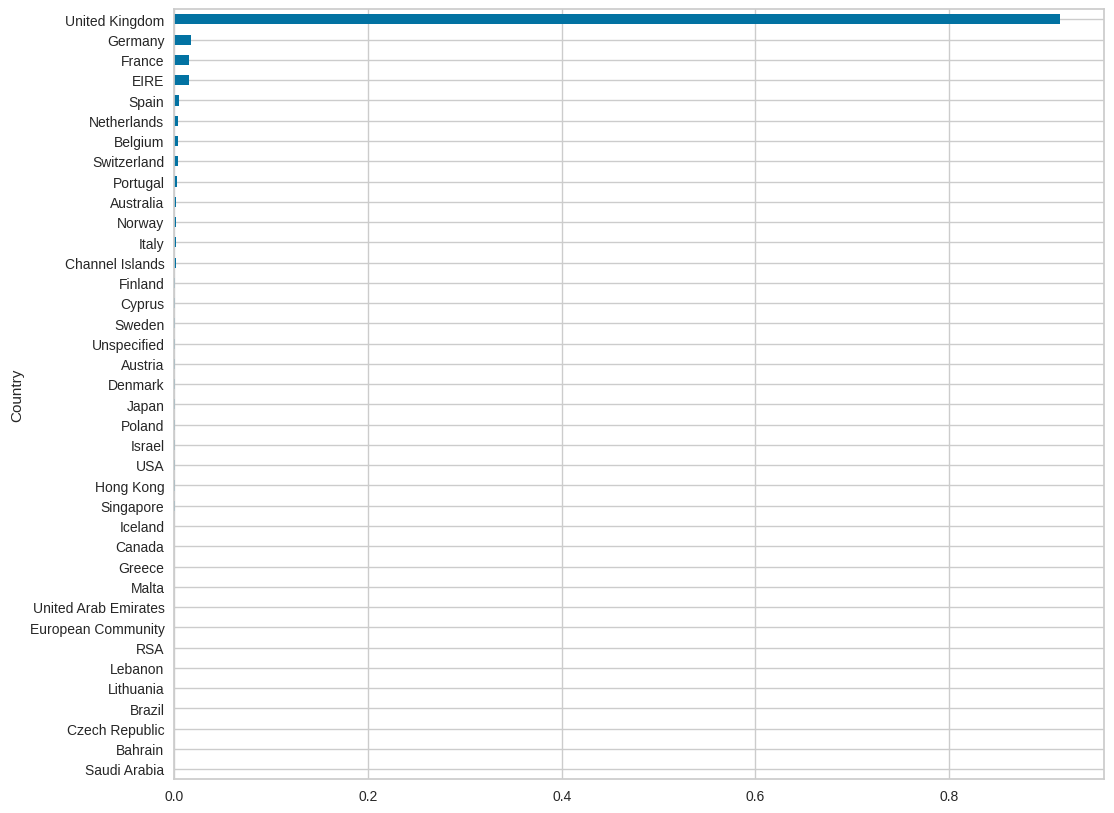

In [15]:
#Quantidade de clientes por país
df['Country'].value_counts(normalize=True, ascending=True).plot.barh(figsize=(12,10))

In [16]:
#Distribuição e variabilidade dos dados nas colunas Quantity e UnitPrice
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [17]:
#Porcentagem que cada país tem presente em relação ao total de dados
df.stb.freq(['Country'])

,Country,count,percent,cumulative_count,cumulative_percent
0,United Kingdom,495478,91.431956,495478,91.431956
1,Germany,9495,1.752139,504973,93.184095
2,France,8557,1.579047,513530,94.763143
3,EIRE,8196,1.512431,521726,96.275574
4,Spain,2533,0.467422,524259,96.742996
5,Netherlands,2371,0.437527,526630,97.180523
6,Belgium,2069,0.381798,528699,97.562321
7,Switzerland,2002,0.369435,530701,97.931756
8,Portugal,1519,0.280305,532220,98.212061
9,Australia,1259,0.232327,533479,98.444388


In [19]:
#Quantidade de dados faltantes por coluna
df.isna().sum().sort_values(ascending= False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [21]:
#podemos olhar desta forma também
df.stb.missing()

,missing,total,percent
CustomerID,135080,541909,24.926694
Description,1454,541909,0.268311
InvoiceNo,0,541909,0.000000
StockCode,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


In [20]:
#Quantidade de dados duplicados
df.duplicated().sum()

5268

#Data Preparation

##Data Cleaning

In [22]:
#Removendo dados nulos
df = df.dropna(subset=['CustomerID'])

In [23]:
df.stb.missing()

,missing,total,percent
InvoiceNo,0,406829,0.0
StockCode,0,406829,0.0
Description,0,406829,0.0
Quantity,0,406829,0.0
InvoiceDate,0,406829,0.0
UnitPrice,0,406829,0.0
CustomerID,0,406829,0.0
Country,0,406829,0.0


In [24]:
#Alterando o formato da coluna InvoiceDate para Data
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format = '%m/%d/%Y %H:%M')

<ipython-input-24-1ffcfdebcb12>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
#alterando CustomerID para Int e Country para Category
df['CustomerID'] = df['CustomerID'].astype(int)
df['Country'] = df['Country'].astype('category')

<ipython-input-26-68d7b1a2f4bb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-68d7b1a2f4bb>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
df = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 25.2+ MB


In [28]:
#Datas de começo e fim do dataset
df.InvoiceDate.agg(['min','max'])

min   2010-12-01 08:26:00
max   2011-12-09 12:50:00
Name: InvoiceDate, dtype: datetime64[ns]

In [29]:
#Removendo os valores negativos na coluna Quantity e UnitPrice
below0 = df[['Quantity', 'UnitPrice']].le(0).any(axis=1)
df = df[~below0].copy()

###Removendo Outliers

<Axes: >

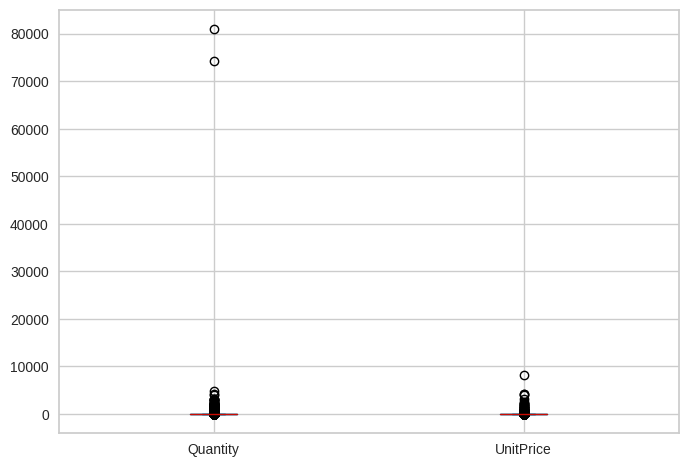

In [30]:
#Outliers
df[['Quantity', 'UnitPrice']].plot.box()

In [31]:
#Quantidades acima de 10mil
df.query('Quantity>10_000')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


In [32]:
#Quantidades acima de 8mil
df.query('UnitPrice>8_000')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom


In [33]:
#Removendo os valores acima no dataset para que não interfiram na análise
df = df.query('Quantity<10_000 & UnitPrice<8_000').copy()

### Criando coluna Price_total

In [34]:
df['price_total'] = df.Quantity * df.UnitPrice
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,price_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


### RFM

In [36]:
df_rfm = (
    df.groupby('CustomerID')
    .agg(
        R = ('InvoiceDate', lambda x: (pd.Timestamp('2012-01-01') - x.max()).days),
        F = ('InvoiceDate', 'nunique'),
        M = ('price_total', 'mean')
    )
)
df_rfm

,R,F,M
CustomerID,,,
12347,24,7,23.681319
12348,97,4,57.975484
12349,40,1,24.076027
12350,332,1,19.670588
12352,58,8,29.482824
...,...,...,...
18280,299,1,18.060000
18281,202,1,11.545714
18282,29,2,14.837500


#### Outliers RFM

<Axes: >

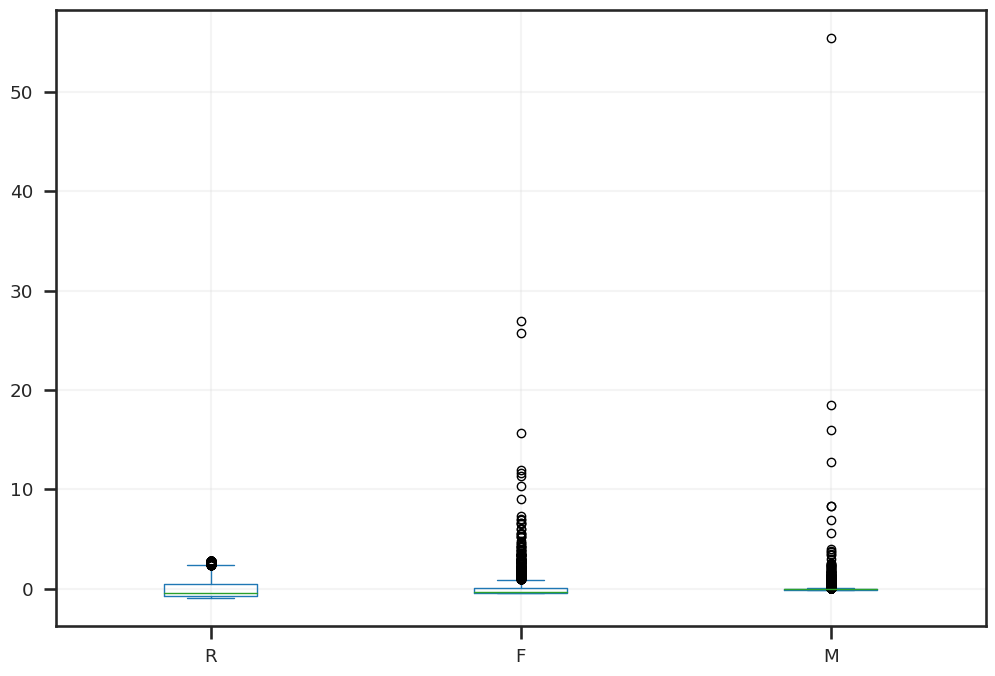

In [39]:
df_rfm.apply(scale).plot.box()

In [40]:
#Identificando o outlier
df_rfm.apply(scale).query('M>50')

,R,F,M
CustomerID,,,
15098,0.899878,-0.163897,55.434876


In [41]:
df.query('CustomerID==15098')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,price_total
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098,United Kingdom,297.0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098,United Kingdom,649.5


<Axes: >

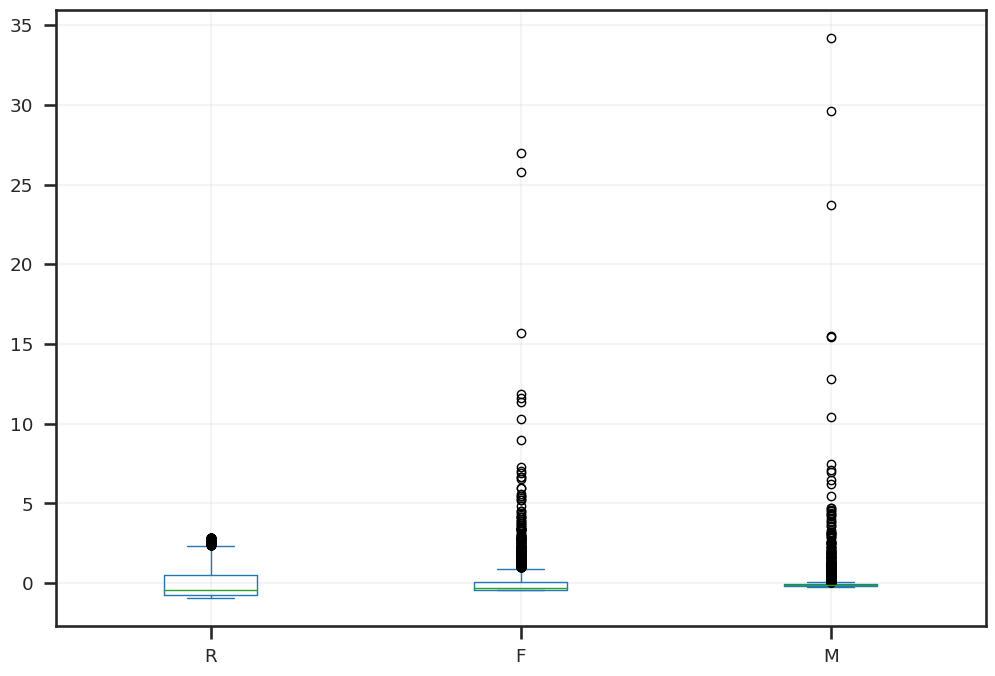

In [42]:
#Removendo
df_rfm = df_rfm.drop(15098)
df_rfm.apply(scale).plot.box()

#### Normalização dos dados

In [43]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()

In [45]:
#Normalizando os dados
df_rfm_scaled = pd.DataFrame(scaler.fit_transform(df_rfm), index=df_rfm.index, columns=df_rfm.columns)
df_rfm_scaled

,R,F,M
CustomerID,,,
12347,-1.563219,1.204110,0.407836
12348,0.323470,0.662321,1.329304
12349,-0.809134,-1.157612,0.426829
12350,1.568467,-1.157612,0.189376
12352,-0.307718,1.312054,0.653411
...,...,...,...
18280,1.475652,-1.157612,0.085562
18281,1.107356,-1.157612,-0.491003
18282,-1.275046,-0.194741,-0.161007


<Axes: >

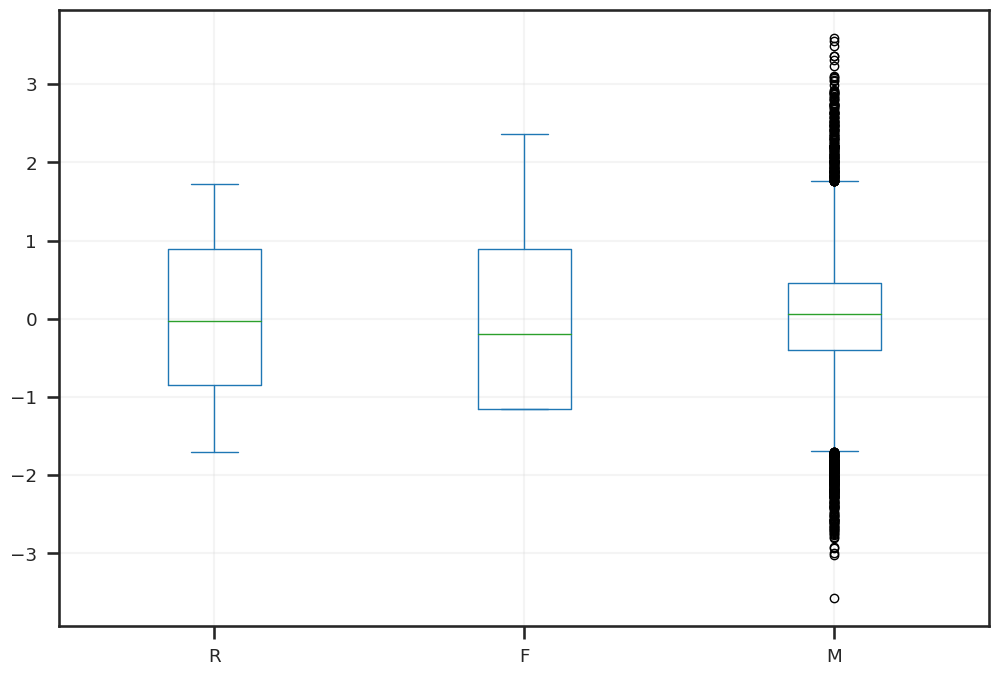

In [46]:
df_rfm_scaled.plot.box()

In [50]:
df_rfm.describe()

,R,F,M
count,4336.000000,4336.000000,4336.000000
mean,114.032288,4.251384,34.554185
std,99.968352,7.635164,129.202663
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.339095
50%,72.000000,2.000000,17.715999
75%,163.250000,5.000000,24.843993
max,395.000000,210.000000,4453.430000


In [51]:
df_rfm_clip = df_rfm.apply(lambda x: x.clip(upper=x.quantile(.95)))
df_rfm_clip.describe()

,R,F,M
count,4336.000000,4336.000000,4336.000000
mean,112.248155,3.601476,23.634656
std,95.504576,3.349580,20.993635
min,22.000000,1.000000,1.450000
25%,39.000000,1.000000,12.339095
50%,72.000000,2.000000,17.715999
75%,163.250000,5.000000,24.843993
max,333.000000,13.000000,91.768421


In [52]:
df_rfm_clip_scaled = df_rfm_clip.apply(scale)

# Modeling & Model Evaluation

## K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

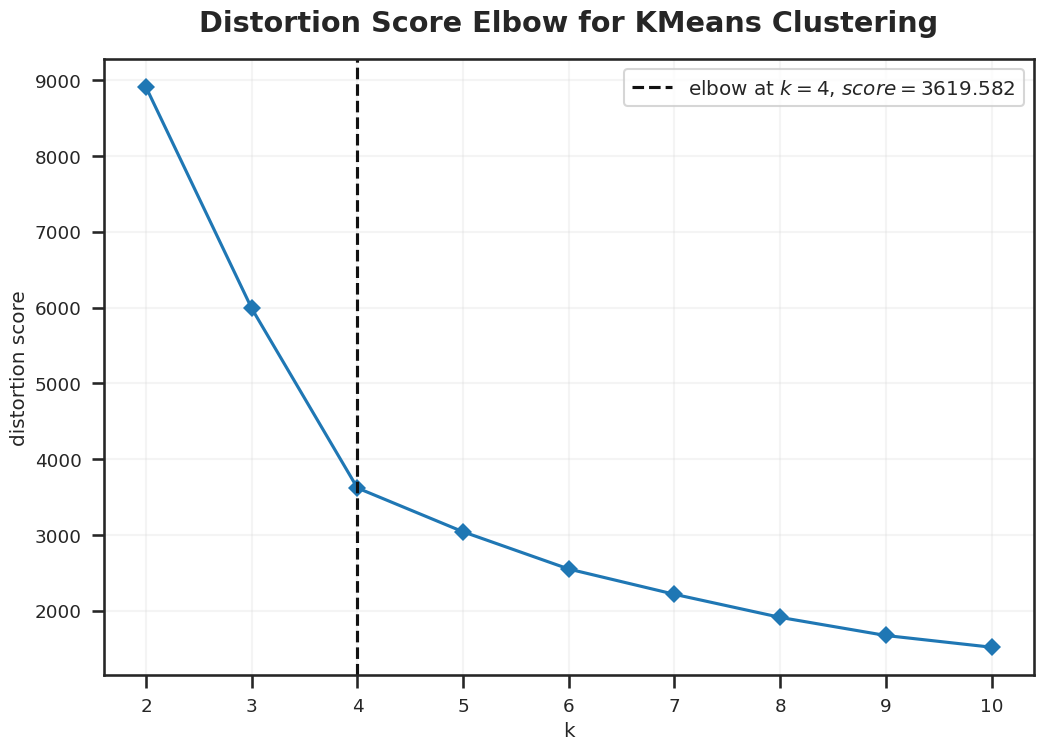

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [53]:
kelbow_visualizer(KMeans(), df_rfm_clip_scaled, k=10, timings=False)

In [58]:
#Quantos K usar
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfm_clip_scaled.copy()

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,8907.313814,0.382457,1.065126,1995.258411
3,5988.877776,0.435956,0.858270,2539.194965
4,3619.589633,0.479447,0.704928,3745.425485
5,3041.854006,0.484794,0.738235,3547.456438
6,2550.585772,0.396587,0.853771,3550.606295
7,2217.161656,0.375680,0.872359,3511.512047
8,1913.435228,0.382557,0.864006,3584.974090
9,1673.649022,0.393286,0.802662,3662.934704
10,1518.948645,0.351944,0.888241,3635.675265


In [55]:
#Utilizando 4K's
kmeans = KMeans(4)
kmeans_labels = kmeans.fit_predict(df_rfm_clip_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [56]:
px.scatter_3d(df_rfm_clip, x='R', y='F', z='M', color=kmeans_labels.astype(str), template='plotly_dark')

## Hierarchical Clustering

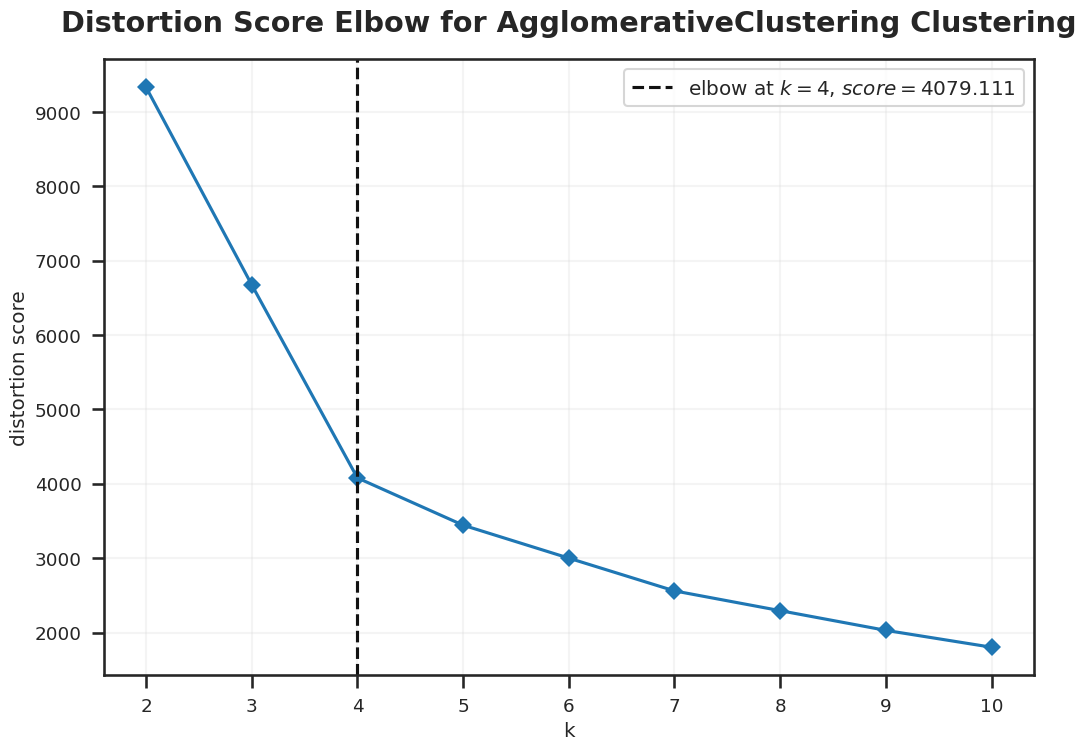

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=10),
                 timings=False)

In [57]:
kelbow_visualizer(AgglomerativeClustering(), df_rfm_clip_scaled, k=10, timings=False)

In [59]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfm_clip_scaled.copy()

for k in range(2,11):
  model = AgglomerativeClustering(n_clusters=k)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  # cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,
2,0.346315,1.359596,1705.905863
3,0.362953,1.096546,2054.525181
4,0.432146,0.790370,3160.815041
5,0.437245,0.762822,3007.132586
6,0.372478,0.845041,2888.503860
7,0.380344,0.907104,2945.019932
8,0.354471,0.893914,2887.778027
9,0.299125,1.011490,2926.833519
10,0.306445,0.960005,2988.960029


In [60]:
hclust = AgglomerativeClustering(n_clusters=4)
hclust_labels = hclust.fit_predict(df_rfm_clip_scaled)

In [61]:
px.scatter_3d(df_rfm_clip, x='R', y='F', z='M', color=hclust_labels.astype(str), template='plotly_dark')

## Gaussian Mixture

In [62]:
results = []
k_range = range(1,9)
covariance_types = ['full', 'tied', 'diag', 'spherical']
X = df_rfm_clip_scaled.copy()

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, n_init=10, warm_start=True, covariance_type=covariance_type)
    mclust.fit(X)
    results.append({
      'bic': mclust.bic(X),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results.sort_values('bic').head()

,bic,n_components,covariance_type
28,-36.768159,8,full
30,-10.742888,8,diag
26,143.598493,7,diag
24,1873.898670,7,full
22,8977.055880,6,diag


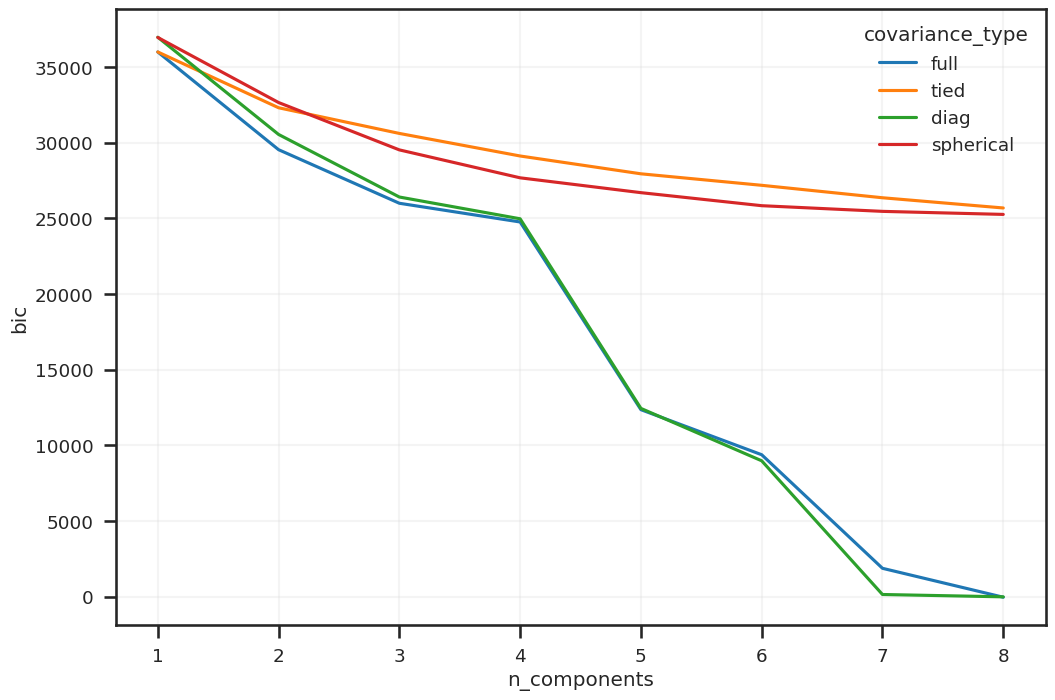

In [63]:
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type');

In [64]:
mclust = GaussianMixture(n_components=5, covariance_type='full', n_init=10)
mclust_labels = mclust.fit_predict(df_rfm_clip_scaled)

In [65]:
px.scatter_3d(df_rfm_clip, x='R', y='F', z='M', color=mclust_labels.astype(str), template='plotly_dark')

# Analise e Interpretação dos Clusters

In [67]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_rfm_clip_scaled.columns)

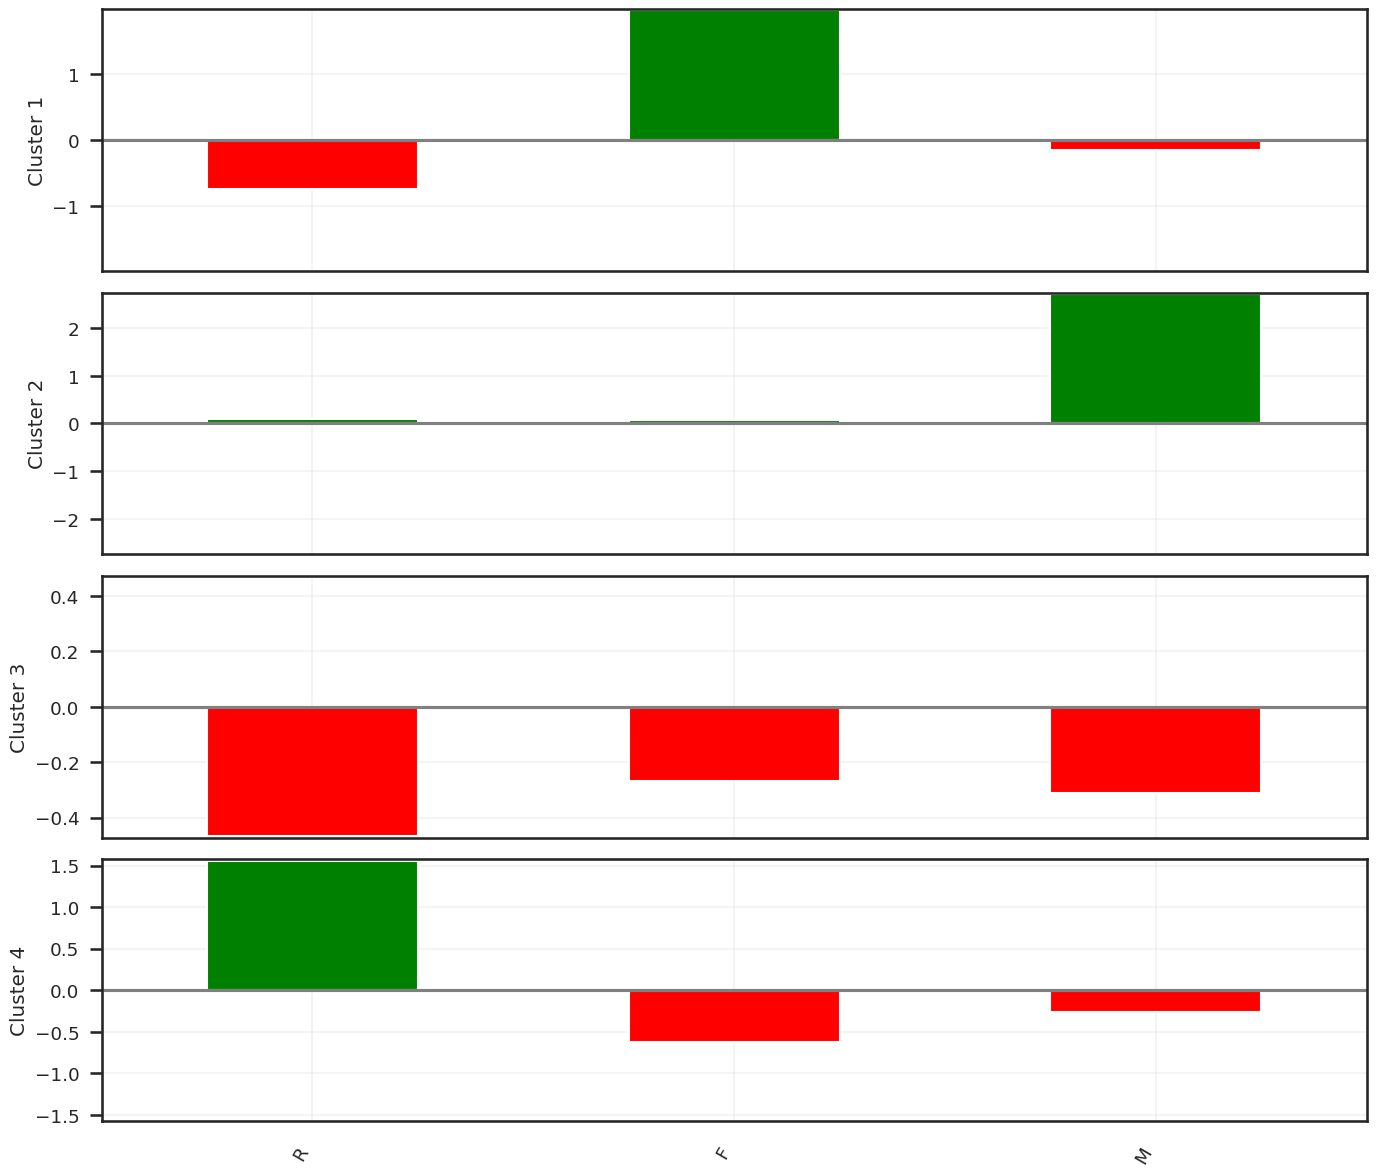

In [68]:
# Adaptado do livro "Practical Statistics for Data Scientists"
fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [69]:
(
  df_rfm_clip.assign(cluster=kmeans_labels)
  .groupby('cluster')
  .mean()
  .transpose()
  .style.background_gradient(cmap='YlOrRd', axis=1)
)

cluster,0,1,2,3
R,41.393496,121.057935,67.533418,261.082051
F,10.173984,3.869018,2.702852,1.511795
M,20.411578,80.714098,17.127147,18.104189


##Observações e Ações Recomendadas

### Cluster 0

**Perfil:** Clientes Ativos e Engajados

**Pontos Negativos:**

► Pode haver uma tendência a comprar itens de menor valor, o que pode limitar o potencial de lucro.

► A dependência de descontos pode diminuir a lucratividade a longo prazo.

**Ações Recomendadas:**

► Oferecer descontos especiais para incentivar compras frequentes.

► Criar pacotes de produtos relacionados para aumentar o valor total das compras.

► Enviar e-mails personalizados com recomendações de produtos com base no histórico de compras.

###Cluster 1

**Perfil:**  Clientes de Alto Valor

**Pontos Negativos:**

► A baixa frequência de compras pode indicar uma menor lealdade à marca.

► A longa janela entre as compras pode indicar uma falta de engajamento ou interesse contínuo.

**Ações Recomendadas:**

► Enviar ofertas exclusivas para incentivar uma nova compra.

► Implementar um programa VIP com recompensas especiais para clientes fiéis.

► Personalizar comunicações para mostrar produtos de alto valor que possam interessá-los.

###Cluster 2

**Perfil:**  Clientes Moderadamente Engajados

**Pontos Negativos:**

► O valor médio da compra é relativamente baixo, o que pode limitar o retorno sobre o investimento em estratégias de marketing.

► A frequência moderada de compras pode indicar uma falta de comprometimento com a marca.

**Ações Recomendadas:**

► Criar promoções especiais para incentivar compras mais frequentes.

► Oferecer descontos progressivos conforme aumenta o valor total das compras.

► Realizar pesquisas de satisfação para entender melhor suas preferências e ajustar a oferta de produtos.



###Cluster 3

**Perfil:**  Clientes Inativos ou Esporádicos

**Pontos Negativos:**

► A longa janela entre as compras e a baixa frequência podem indicar clientes perdidos ou que estão se afastando da marca

► O baixo valor médio da compra pode indicar que esses clientes estão apenas fazendo compras ocasionais ou aproveitando promoções.

**Ações Recomendadas:**

► Enviar ofertas irresistíveis para incentivar o retorno e uma nova compra.

► Criar anúncios personalizados em redes sociais para lembrá-los da marca.

► Implementar estratégias de remarketing para manter a marca presente e incentivá-los a comprar novamente.